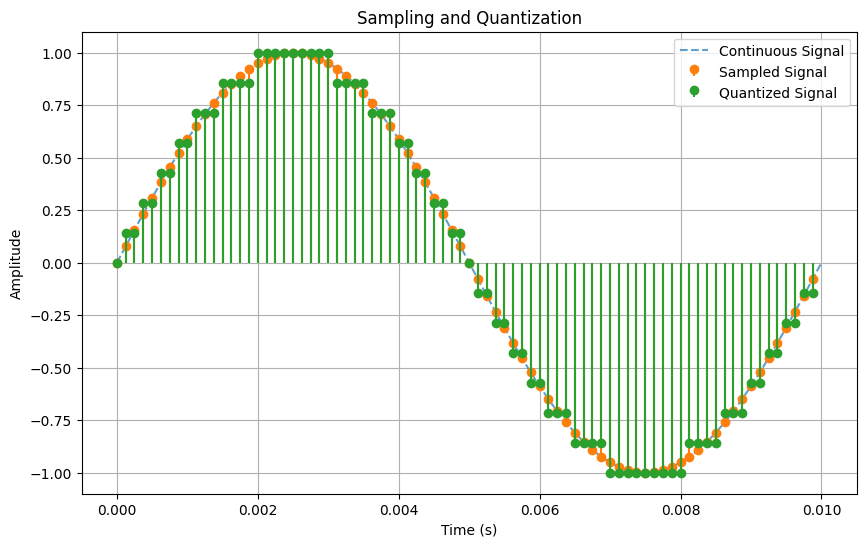

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sampling_rate = 8000  # Sampling rate in Hz
duration = 0.01       # Duration of the signal in seconds
frequency = 100       # Frequency of the sine wave in Hz 
bit_depth = 4         # Bit depth for quantization

# Generate a continuous sine wave
t_continuous = np.linspace(0, duration, 1000)  # High-resolution time for continuous signal
signal_continuous = np.sin(2 * np.pi * frequency * t_continuous)

# Simulate sampling
t_sampled = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
signal_sampled = np.sin(2 * np.pi * frequency * t_sampled)

# Quantization
# Scaling it to fit the range of discrete quantization levels.
# Rounding it to the nearest quantization level.
# Normalizing it back to the original range of [-1, 1].
quantization_levels = 2 ** bit_depth
signal_quantized = np.round((signal_sampled + 1) * (quantization_levels / 2 - 1)) / (quantization_levels / 2 - 1) - 1

# Plotting
plt.figure(figsize=(10, 6))

# Continuous signal
plt.plot(t_continuous, signal_continuous, label="Continuous Signal", linestyle="--", alpha=0.7)

# Sampled signal
plt.stem(t_sampled, signal_sampled, linefmt="C1-", markerfmt="C1o", basefmt=" ", label="Sampled Signal")

# Quantized signal
plt.stem(t_sampled, signal_quantized, linefmt="C2-", markerfmt="C2o", basefmt=" ", label="Quantized Signal")

plt.title("Sampling and Quantization")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

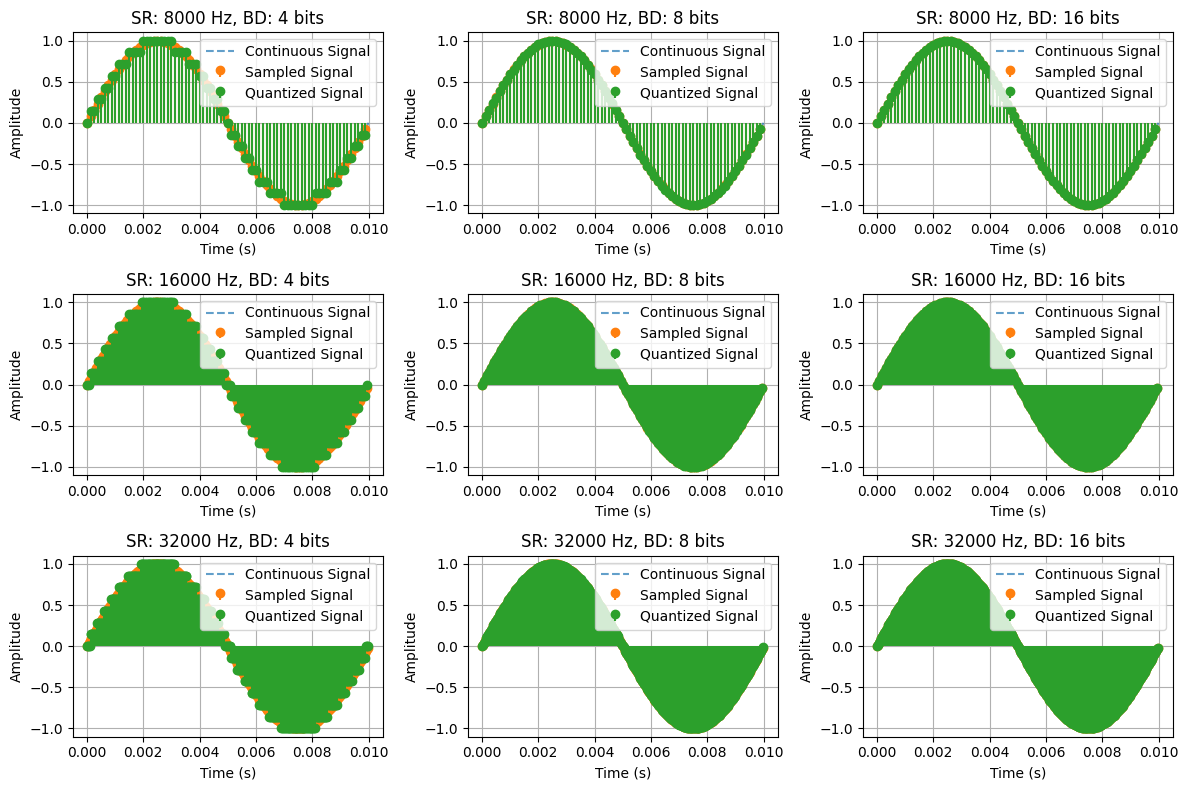

In [17]:
# Compare singal quantized using different bit depths and sampled using different sampling rates
def plot_quantization_comparison(frequency, sampling_rates, bit_depths, duration):
    t_continuous = np.linspace(0, duration, 1000)
    signal_continuous = np.sin(2 * np.pi * frequency * t_continuous)

    plt.figure(figsize=(12, 8))

    for i, sampling_rate in enumerate(sampling_rates):
        for j, bit_depth in enumerate(bit_depths):
            t_sampled = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
            signal_sampled = np.sin(2 * np.pi * frequency * t_sampled)

            quantization_levels = 2 ** bit_depth
            signal_quantized = np.round((signal_sampled + 1) * (quantization_levels / 2 - 1)) / (quantization_levels / 2 - 1) - 1

            plt.subplot(len(sampling_rates), len(bit_depths), i * len(bit_depths) + j + 1)
            plt.plot(t_continuous, signal_continuous, label="Continuous Signal", linestyle="--", alpha=0.7)
            plt.stem(t_sampled, signal_sampled, linefmt="C1-", markerfmt="C1o", basefmt=" ", label="Sampled Signal")
            plt.stem(t_sampled, signal_quantized, linefmt="C2-", markerfmt="C2o", basefmt=" ", label="Quantized Signal")
            plt.title(f"SR: {sampling_rate} Hz, BD: {bit_depth} bits")
            plt.xlabel("Time (s)")
            plt.ylabel("Amplitude")
            plt.legend()
            plt.grid()

    plt.tight_layout()
    plt.show()
# Define different sampling rates and bit depths for comparison
sampling_rates = [8000, 16000, 32000]  # Different sampling rates in Hz
bit_depths = [4, 8, 16]               # Different bit depths for quantization
# Call the function to plot the comparison
plot_quantization_comparison(frequency, sampling_rates, bit_depths, duration)

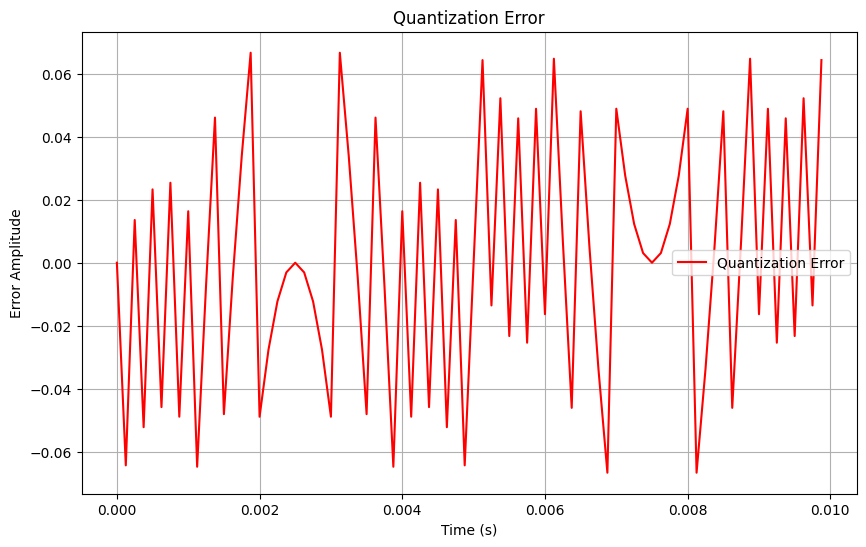

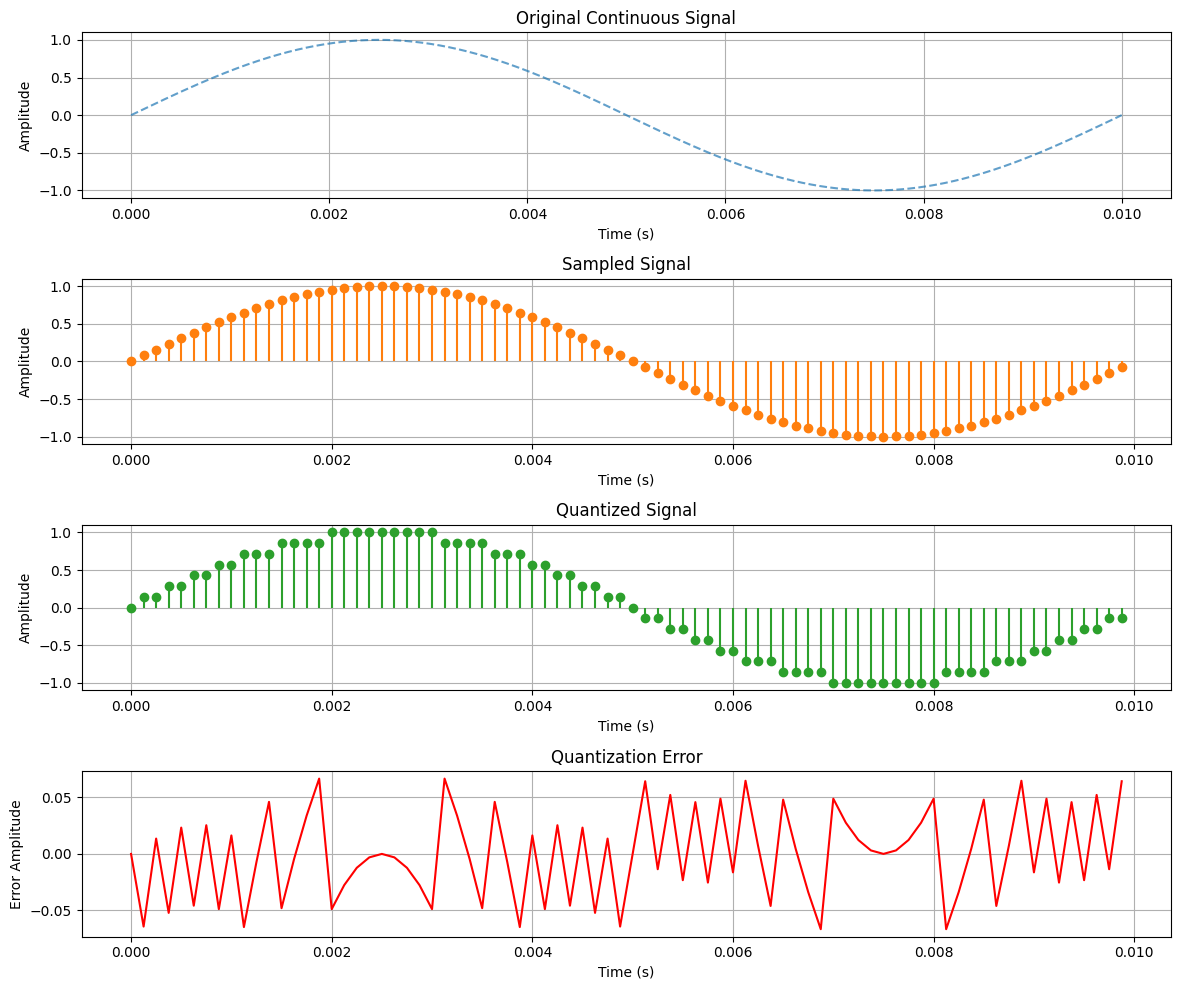

In [18]:
# Quantization error
def quantization_error(signal, quantization_levels):
    # Calculate the quantization error
    quantized_signal = np.round((signal + 1) * (quantization_levels / 2 - 1)) / (quantization_levels / 2 - 1) - 1
    error = signal - quantized_signal
    return error
# Example usage
quantization_levels = 2 ** bit_depth
error = quantization_error(signal_sampled, quantization_levels)
# Plot the quantization error
plt.figure(figsize=(10, 6))
plt.plot(t_sampled, error, label="Quantization Error", color='red')
plt.title("Quantization Error")
plt.xlabel("Time (s)")
plt.ylabel("Error Amplitude")
plt.legend()
plt.grid()
plt.show()

# Plot the original signal, the sampled signal, the quantized signal, and the quantization error in one figure
def plot_all_signals(signal_continuous, signal_sampled, signal_quantized, error, t_continuous, t_sampled):
    plt.figure(figsize=(12, 10))

    # Original continuous signal
    plt.subplot(4, 1, 1)
    plt.plot(t_continuous, signal_continuous, label="Continuous Signal", linestyle="--", alpha=0.7)
    plt.title("Original Continuous Signal")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid()

    # Sampled signal
    plt.subplot(4, 1, 2)
    plt.stem(t_sampled, signal_sampled, linefmt="C1-", markerfmt="C1o", basefmt=" ", label="Sampled Signal")
    plt.title("Sampled Signal")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid()

    # Quantized signal
    plt.subplot(4, 1, 3)
    plt.stem(t_sampled, signal_quantized, linefmt="C2-", markerfmt="C2o", basefmt=" ", label="Quantized Signal")
    plt.title("Quantized Signal")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid()

    # Quantization error
    plt.subplot(4, 1, 4)
    plt.plot(t_sampled, error, label="Quantization Error", color='red')
    plt.title("Quantization Error")
    plt.xlabel("Time (s)")
    plt.ylabel("Error Amplitude")
    plt.grid()

    plt.tight_layout()
    plt.show()
# Call the function to plot all signals
plot_all_signals(signal_continuous, signal_sampled, signal_quantized, error, t_continuous, t_sampled)

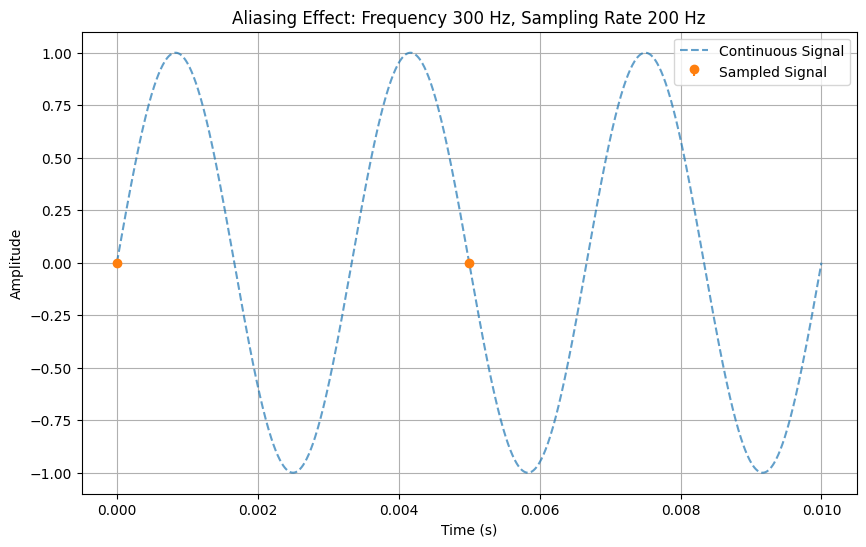

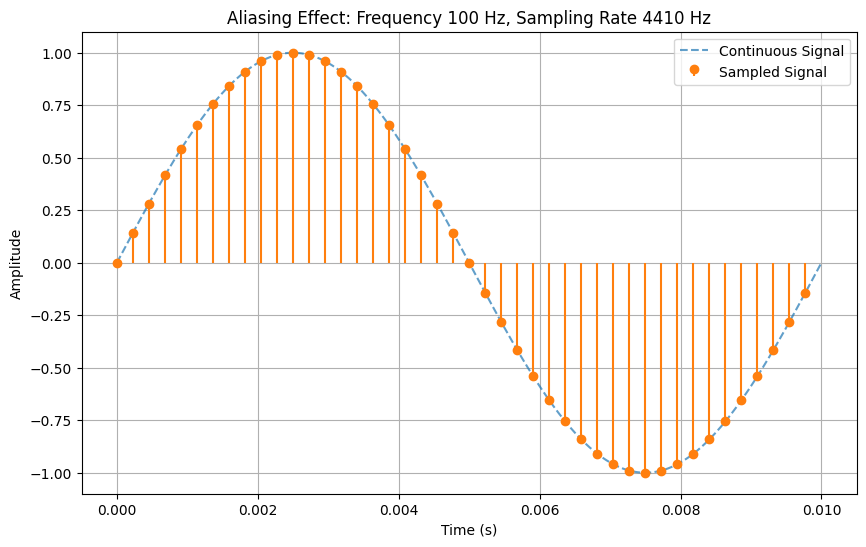

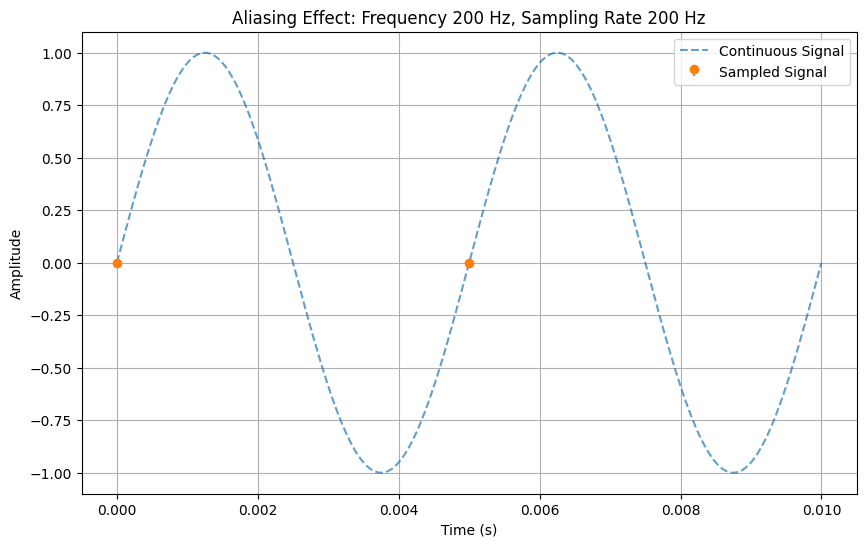

In [23]:
# Aliasing effect
def aliasing_effect(frequency, sampling_rate, duration):
    t_continuous = np.linspace(0, duration, 1000)
    signal_continuous = np.sin(2 * np.pi * frequency * t_continuous)

    # Simulate aliasing by using a lower sampling rate
    t_sampled = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    signal_sampled = np.sin(2 * np.pi * frequency * t_sampled)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(t_continuous, signal_continuous, label="Continuous Signal", linestyle="--", alpha=0.7)
    plt.stem(t_sampled, signal_sampled, linefmt="C1-", markerfmt="C1o", basefmt=" ", label="Sampled Signal")
    plt.title(f"Aliasing Effect: Frequency {frequency} Hz, Sampling Rate {sampling_rate} Hz")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid()
    plt.show()
# Example usage of aliasing effect
aliasing_effect(300, 200, duration)  # Frequency higher than Nyquist rate
aliasing_effect(100, 4410, duration)  # Frequency lower than Nyquist rate
aliasing_effect(200, 200, duration)  # Frequency equals Nyquist rate
# The plots show the effects of sampling and quantization on a continuous sine wave.
# The continuous signal is represented by a dashed line, while the sampled and quantized signals are represented by stem plots.
# The quantization error is shown in a separate plot, indicating the difference between the original and quantized signals.
# The aliasing effect demonstrates how a signal can be misrepresented when sampled below the Nyquist rate.
# The quantization error can be minimized by increasing the bit depth, which allows for more discrete levels and reduces the error.
# The aliasing effect can be avoided by ensuring that the sampling rate is at least twice the highest frequency present in the signal (Nyquist rate).

/var/folders/b0/m80gf4wx3pvdbp860pz1fqwc0000gn/T/ipykernel_76423/2312151195.py:15: RuntimeWarning: divide by zero encountered in log10
  plt.plot(freqs[:512], 20 * np.log10(freq_response[:512]), label="Frequency Response (dB)")


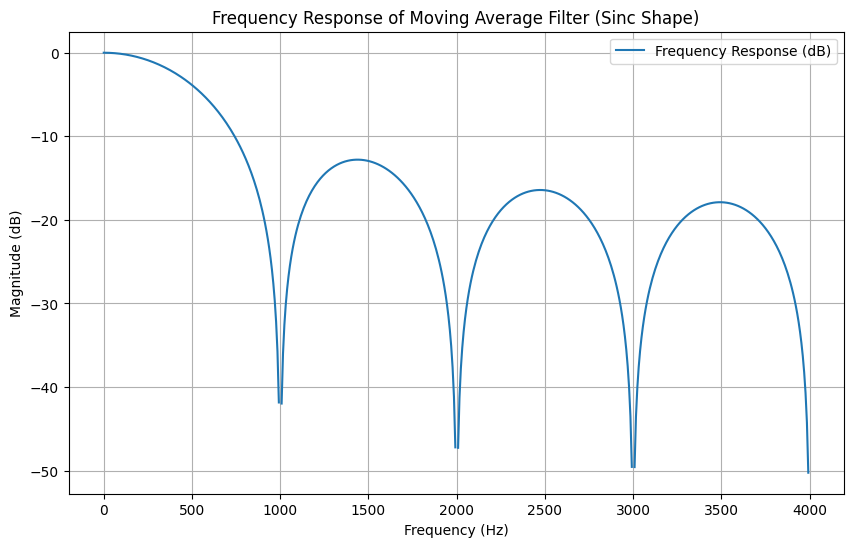

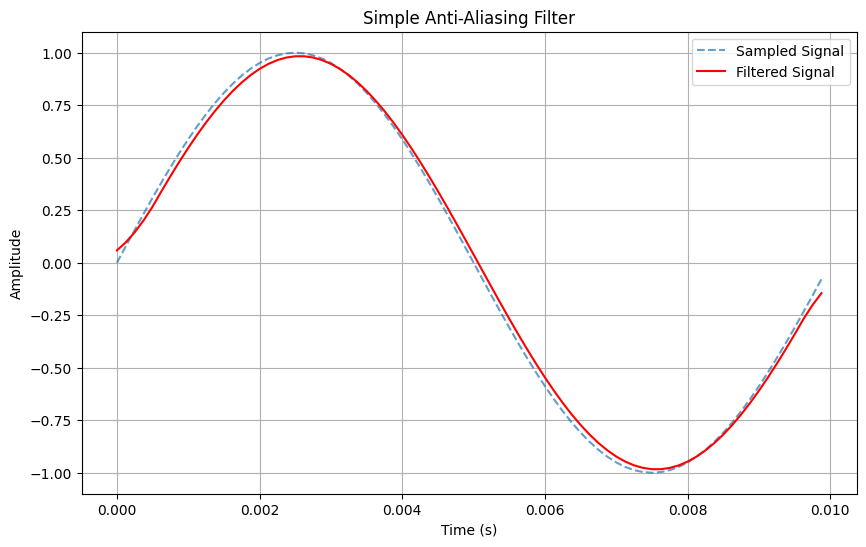

In [26]:
# Simple anti-aliasing filter
def simple_anti_aliasing_filter(signal, cutoff_frequency, sampling_rate):
    # Design a simple low-pass filter using a moving average
    num_samples = int(sampling_rate / cutoff_frequency)
    filter_kernel = np.ones(num_samples) / num_samples
    filtered_signal = np.convolve(signal, filter_kernel, mode='same')

    # The filter kernel is a moving average filter that averages the samples over a specified number of samples.
    # This helps to smooth out the signal and reduce high-frequency noise.
    # The kernel is normalized to ensure that the sum of the coefficients equals 1, preserving the signal's amplitude.
    # The kernel shape is similar to a sinc function, which is the ideal low-pass filter in the frequency domain.
    # The sinc function is defined as sinc(x) = sin(πx)/(πx), and it has a characteristic oscillatory shape.
    # The moving average filter approximates this shape by averaging the samples over a finite window.
    # The length of the kernel is determined by the cutoff frequency, which defines how many samples to average.
    # The longer the kernel, the more aggressive the filtering, but it also introduces more delay.
    # The filter kernel is applied to the signal using convolution, which effectively smooths the signal.

    # Compute the frequency response using FFT
    freq_response = np.fft.fft(filter_kernel, 1024)  # Zero-padding for better resolution
    freq_response = np.abs(freq_response)  # Magnitude of the frequency response
    freqs = np.fft.fftfreq(1024, d=1/sampling_rate)  # Frequency axis

    # Plot the frequency response
    plt.figure(figsize=(10, 6))
    plt.plot(freqs[:512], 20 * np.log10(freq_response[:512]), label="Frequency Response (dB)")
    plt.title("Frequency Response of Moving Average Filter (Sinc Shape)")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (dB)")
    plt.grid()
    plt.legend()
    plt.show()

    return filtered_signal
# Example usage of anti-aliasing filter
cutoff_frequency = 1000  # Cutoff frequency in Hz
filtered_signal = simple_anti_aliasing_filter(signal_sampled, cutoff_frequency, sampling_rate)
# Plot the filtered signal
plt.figure(figsize=(10, 6))
plt.plot(t_sampled, signal_sampled, label="Sampled Signal", linestyle="--", alpha=0.7)
plt.plot(t_sampled, filtered_signal, label="Filtered Signal", color='red')
plt.title("Simple Anti-Aliasing Filter")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()
# The simple anti-aliasing filter is a basic low-pass filter that can help reduce high-frequency noise and prevent aliasing.
# It works by averaging the samples over a specified number of samples determined by the cutoff frequency.
# This can help to smooth out the signal and reduce the risk of aliasing when sampling at lower rates.

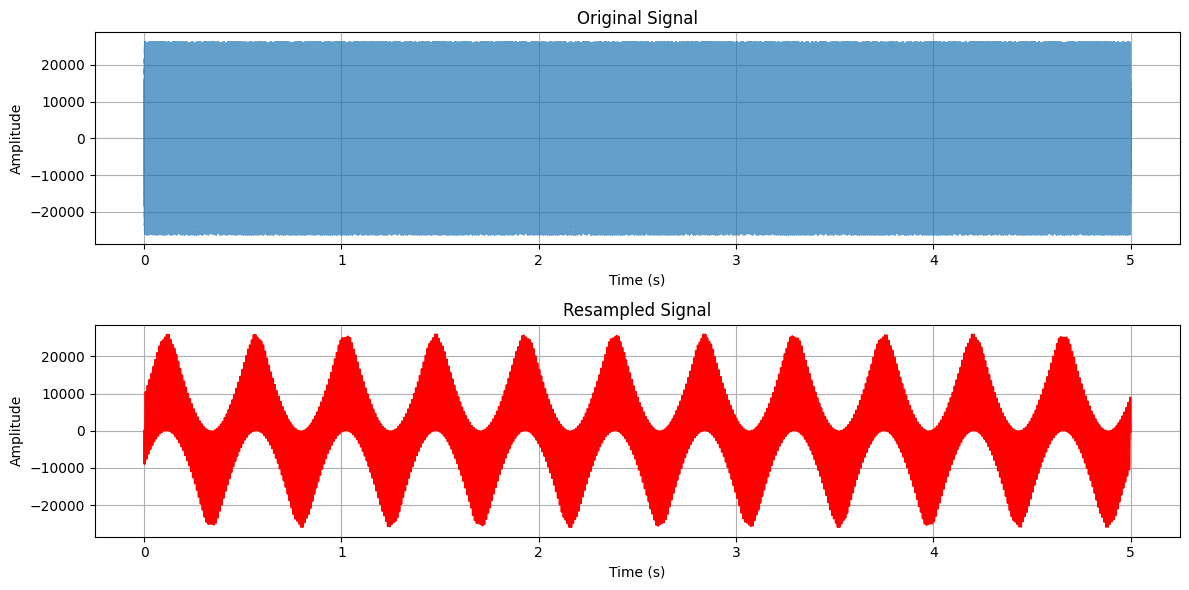

In [33]:
# Sample rate conversion
from scipy.io.wavfile import read as wav_read

def sample_rate_conversion(signal, original_rate, target_rate):
    # Resample the signal to the target sampling rate
    num_samples = int(len(signal) * target_rate / original_rate)
    resampled_signal = np.interp(np.linspace(0, len(signal), num_samples), np.arange(len(signal)), signal)

    # The resampling process involves interpolating the original signal to create a new signal with the desired number of samples.
    # This is done using linear interpolation, which estimates the values between the original samples.
    # The new time axis is created by scaling the original time axis according to the target sampling rate.
    # The resampled signal is then obtained by evaluating the original signal at the new time points.

    return resampled_signal
# Example usage of sample rate conversion

# Load audio file
sample_rate, audio = wav_read("Data/5sec_22kHztone.wav")

original_rate = 44100  # Original sampling rate in Hz
target_rate = 2000  # Target sampling rate in Hz
resampled_signal = sample_rate_conversion(audio, original_rate, target_rate)
# Plot the original and resampled signals in two subplots
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)    
plt.plot(np.linspace(0, len(audio) / original_rate, len(audio)), audio, label="Original Signal", linestyle="--", alpha=0.7)
plt.title("Original Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.subplot(2, 1, 2)    
plt.plot(np.linspace(0, len(resampled_signal) / target_rate, len(resampled_signal)), resampled_signal, label="Resampled Signal", color='red')
plt.title("Resampled Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.tight_layout()
plt.show()